In [9]:
# WeatherPy


#### Note Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#3 Observations:
1.

2.

3. 

3.0

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, datetime
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
## Generate Cities List

#cities and lattitudes and longitudes
cities = []
lats_lngs = []

lats = np.random.uniform(low=-90, high=90, size=2500)
lngs = np.random.uniform(low=-180, high=180, size=2500)
lats_lngs = zip(lats,lngs)


for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # check if city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
len(cities)
# convert to dataframe
city_df = pd.DataFrame(cities)
city_df.columns = ["City"]
city_df.head()

### Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).


cities[0]
api_key

'bd3384ff64622a378c15cb4d5755d04f'

In [14]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" + cities[0]

#testing connection
response = requests.get(query_url)

weather_json = response.json()

print(f"The weather API responded with: {weather_json}.")

### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

#create dataframe to hold all values
weather_df = pd.DataFrame(columns = ["City","Country","Lat","Lng","Date","Temperature","Max_Temperature",
                                    "Min_Temperature","Humidity","Cloudiness","Wind Speed"])

print(f'Beginning Data Retrieval')
print(f'------------------------------')
for index, city in city_df.iterrows():

   city_name = city['City']

   #assemble url and make API request
   query_url = url + "appid=" + api_key + "&q=" + city_name
   response = requests.get(query_url).json()

   try:
       print(f'Processing Record {index} of Set 1 | ' + city_name)

       if response['main']['temp'] != '':
           #saving to a dataframe
           weather_df.loc[index,'City'] = city_name
           weather_df.loc[index,'Country'] = response['sys']['country']
           weather_df.loc[index,'Temperature'] = response['main']['temp']
           weather_df.loc[index,'Max_Temperature'] = response['main']['temp_max']
           weather_df.loc[index,'Min_Temperature'] = response['main']['temp_min']
           weather_df.loc[index,'Lat'] = response['coord']['lat']
           weather_df.loc[index,'Lng'] = response['coord']['lon']
           weather_df.loc[index,'Date'] = response['dt']
           weather_df.loc[index,'Humidity'] = response['main']['humidity']
           weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
           weather_df.loc[index,'Wind Speed'] = response['wind']['speed']
       else:
           print(f'City not found. Skipping...')
   except (KeyError,IndexError):
       print(f'City not found. Skipping...')

weather_df.head()

exportweather = weather_df.to_csv(r"weather_data.csv", index=None, header=True)
weather_df.head()

The weather API responded with: {'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 503, 'main': 'Rain', 'description': 'very heavy rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.1, 'pressure': 1011, 'humidity': 78, 'temp_min': 293.71, 'temp_max': 299.15}, 'visibility': 6437, 'wind': {'speed': 3.61, 'deg': 132}, 'rain': {'1h': 18.29}, 'clouds': {'all': 90}, 'dt': 1572400295, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1572366002, 'sunset': 1572407271}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}.
Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | hilo
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | tabuk
Processing Record 4 of Set 1 | sola
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1

Processing Record 172 of Set 1 | mount gambier
Processing Record 173 of Set 1 | severo-kurilsk
Processing Record 174 of Set 1 | hami
Processing Record 175 of Set 1 | kampong thum
Processing Record 176 of Set 1 | touros
Processing Record 177 of Set 1 | green river
Processing Record 178 of Set 1 | samusu
City not found. Skipping...
Processing Record 179 of Set 1 | mar del plata
Processing Record 180 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 181 of Set 1 | bathsheba
Processing Record 182 of Set 1 | linxia
Processing Record 183 of Set 1 | east london
Processing Record 184 of Set 1 | luanda
Processing Record 185 of Set 1 | port lincoln
Processing Record 186 of Set 1 | san policarpo
Processing Record 187 of Set 1 | muros
Processing Record 188 of Set 1 | little current
Processing Record 189 of Set 1 | anadyr
Processing Record 190 of Set 1 | beisfjord
Processing Record 191 of Set 1 | markova
Processing Record 192 of Set 1 | lanigan
Processing Record 193 of Set 1 | 

Processing Record 358 of Set 1 | faya
Processing Record 359 of Set 1 | roma
Processing Record 360 of Set 1 | almendralejo
Processing Record 361 of Set 1 | ossora
Processing Record 362 of Set 1 | rocha
Processing Record 363 of Set 1 | marcona
City not found. Skipping...
Processing Record 364 of Set 1 | port hedland
Processing Record 365 of Set 1 | iquique
Processing Record 366 of Set 1 | stornoway
City not found. Skipping...
Processing Record 367 of Set 1 | kjollefjord
Processing Record 368 of Set 1 | ostrovnoy
Processing Record 369 of Set 1 | manacapuru
Processing Record 370 of Set 1 | minab
Processing Record 371 of Set 1 | calabozo
Processing Record 372 of Set 1 | arlit
Processing Record 373 of Set 1 | luganville
Processing Record 374 of Set 1 | kyren
Processing Record 375 of Set 1 | quatre cocos
Processing Record 376 of Set 1 | esperance
Processing Record 377 of Set 1 | akureyri
Processing Record 378 of Set 1 | komsomolskiy
Processing Record 379 of Set 1 | marathon
Processing Record 

Processing Record 537 of Set 1 | ahuimanu
Processing Record 538 of Set 1 | rumonge
Processing Record 539 of Set 1 | cordoba
Processing Record 540 of Set 1 | rawson
Processing Record 541 of Set 1 | maldonado
Processing Record 542 of Set 1 | bezhetsk
Processing Record 543 of Set 1 | zhigansk
Processing Record 544 of Set 1 | sao felix do xingu
Processing Record 545 of Set 1 | tambura
City not found. Skipping...
Processing Record 546 of Set 1 | ishigaki
Processing Record 547 of Set 1 | nizhniy odes
Processing Record 548 of Set 1 | sabya
Processing Record 549 of Set 1 | acapulco
Processing Record 550 of Set 1 | cardston
Processing Record 551 of Set 1 | linjiang
Processing Record 552 of Set 1 | ahumada
City not found. Skipping...
Processing Record 553 of Set 1 | ivanovice na hane
Processing Record 554 of Set 1 | santa marta
Processing Record 555 of Set 1 | montague
Processing Record 556 of Set 1 | chicama
Processing Record 557 of Set 1 | orel-izumrud
Processing Record 558 of Set 1 | baruun-u

Processing Record 718 of Set 1 | cervo
Processing Record 719 of Set 1 | nochistlan
Processing Record 720 of Set 1 | mahon
Processing Record 721 of Set 1 | alyangula
Processing Record 722 of Set 1 | wamba
Processing Record 723 of Set 1 | mont-dore
Processing Record 724 of Set 1 | eureka
Processing Record 725 of Set 1 | moose factory
Processing Record 726 of Set 1 | sept-iles
Processing Record 727 of Set 1 | tarakan
Processing Record 728 of Set 1 | chimbote
Processing Record 729 of Set 1 | lumut
Processing Record 730 of Set 1 | lokosovo
Processing Record 731 of Set 1 | kudat
Processing Record 732 of Set 1 | orlik
Processing Record 733 of Set 1 | ust-nera
Processing Record 734 of Set 1 | pointe michel
Processing Record 735 of Set 1 | deputatskiy
Processing Record 736 of Set 1 | kutum
Processing Record 737 of Set 1 | tarko-sale
Processing Record 738 of Set 1 | hobyo
Processing Record 739 of Set 1 | santa isabel
Processing Record 740 of Set 1 | akyab
City not found. Skipping...
Processing R

,City,Country,Lat,Lng,Date,Temperature,Max_Temperature,Min_Temperature,Humidity,Cloudiness,Wind Speed
0,hilo,US,19.71,-155.08,1572400295,297.1,299.15,293.71,78,90,3.61
1,tasiilaq,GL,65.61,-37.64,1572400295,272.15,272.15,272.15,74,99,2.1
2,arraial do cabo,BR,-22.97,-42.02,1572400295,298.15,298.15,298.15,83,40,4.6
3,tabuk,PH,17.41,121.44,1572400295,300.48,300.48,300.48,79,51,1.78
4,sola,TZ,-3.17,33.8,1572400295,292.19,292.19,292.19,82,43,2.09


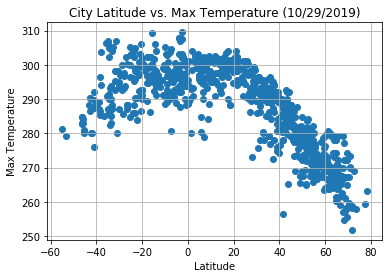

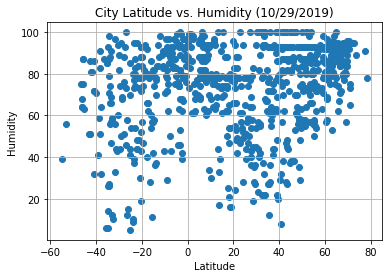

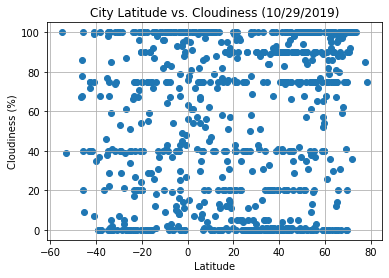

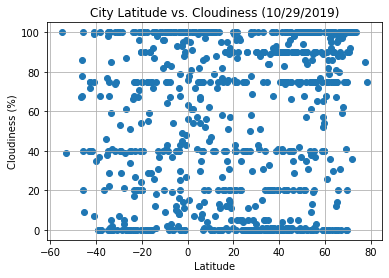

In [16]:
### Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max_Temperature"], marker="o")

d = datetime.datetime.today()

# Incorporate the other graph properties
title = 'City Latitude vs. Max Temperature ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureandLatitudes.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

# Build a scatter plot for humidy and latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"],  marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Humidity ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityandLatitudes.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

# Build a scatter plot for Cloudiness and latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Cloudiness ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessandLatitudes.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

# Build a scatter plot for Cloudiness and latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Cloudiness ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessandLatitudes.png")

# Show plot
plt.show()